In [26]:
#Decision Tree - loan dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import tree

In [47]:
loans = pd.read_csv('loan_data.csv')

In [48]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [49]:
#Categorical data
df = pd.get_dummies(data=loans,columns=['purpose'],drop_first=True)

In [50]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [52]:
df.shape

(9578, 19)

In [58]:
#EDA

In [ ]:
#FICO is an acronym for Fair Isaac Corporation, 
#the company that developed the FICO® credit scoring models that many lenders use to help accurately predict 
#a consumer's ability to repay a debt on time

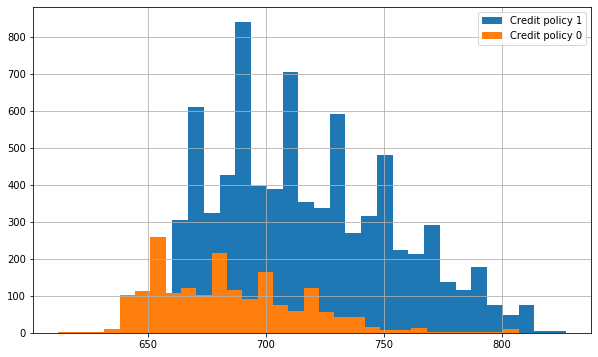

In [33]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins = 30, label = 'Credit policy 1')
df[df['credit.policy']==0]['fico'].hist(bins = 30, label = 'Credit policy 0')
plt.legend()

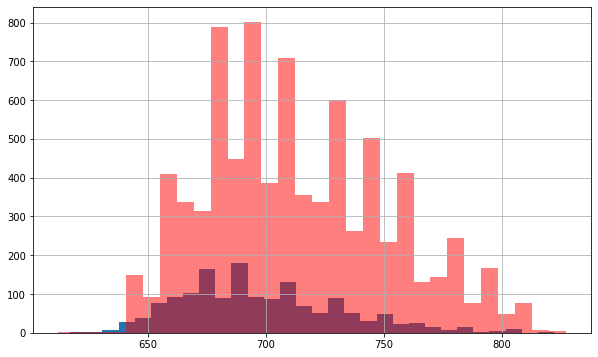

In [42]:
plt.figure(figsize=(10,6))

df[df['not.fully.paid']==1]['fico'].hist(bins = 30)
df[df['not.fully.paid']==0]['fico'].hist(bins = 30,color = 'red', alpha = 0.5)

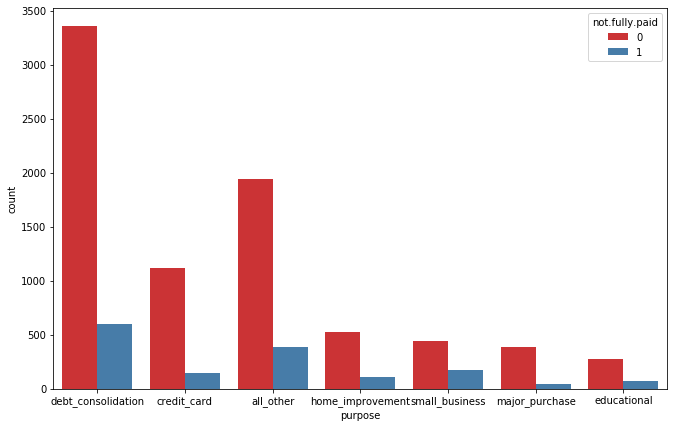

In [53]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

<Figure size 864x432 with 0 Axes>

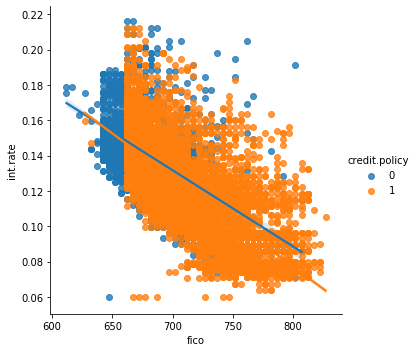

In [57]:
plt.figure(figsize = (12,6))

sns.lmplot(x = 'fico', y ='int.rate', data = df, hue = 'credit.policy' )

In [9]:
#Splitting values
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [12]:
#Model
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=7)

In [14]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print(accuracy_score(y_test,y_pred))

0.8455114822546973


In [19]:
#To check for a specific person details
person = df.iloc[0]

In [20]:
person

credit.policy                     1.000000
int.rate                          0.118900
installment                     829.100000
log.annual.inc                   11.350407
dti                              19.480000
fico                            737.000000
days.with.cr.line              5639.958333
revol.bal                     28854.000000
revol.util                       52.100000
inq.last.6mths                    0.000000
delinq.2yrs                       0.000000
pub.rec                           0.000000
not.fully.paid                    0.000000
purpose_credit_card               0.000000
purpose_debt_consolidation        1.000000
purpose_educational               0.000000
purpose_home_improvement          0.000000
purpose_major_purchase            0.000000
purpose_small_business            0.000000
Name: 0, dtype: float64

In [21]:
#predicting only for first two data
pred = model.predict([df.iloc[0][:-1],df.iloc[1][:-1]])

In [22]:
pred

array([0, 0], dtype=int64)

In [23]:
#Checking accuracy of both the prediction
print(accuracy_score(y_test[:2],pred))

1.0
